## SCT

In [ ]:
from joblib import Parallel, delayed

In [ ]:
# for sample, _ad in singleCellTools.basic.splitAdata(ad, "Sample", needName=True):
#     _ad.write_h5ad(
#         f"/data/Zhaijx/liuzj/projects/singleCell/02_jupyter/circadian/20221122/0628/{sample}.h5ad"
#     )

100%|██████████| 12/12 [00:36<00:00,  3.06s/it]


In [ ]:
# from joblib import Parallel, delayed
# import os
# os.environ['R_HOME'] = '/public/home/liuzj/softwares/anaconda3/envs/circadian/lib/R'
# import rpy2
# import rpy2.robjects as ro
# from rpy2.robjects.packages import importr
# from jpy_tools.rTools import py2r, r2py, r_inline_plot, rHelp, trl, rSet, rGet, ad2so, so2ad, so2md, rcontext, Trl, r2py_re, py2r_re, RR, FR
# from jpy_tools import loadPkl, toPkl
# rBase = importr('base')
# rUtils = importr('utils')
# dplyr = importr('dplyr')
# reticulate = importr('reticulate')
# R = ro.r
# T = Trl()
# R("options(browser='firefox', shiny.port=6533, max.print=200)")
# importr("magrittr")
# import click
# import scanpy as sc
# from jpy_tools import loadPkl, toPkl
# from jpy_tools import singleCellTools
# @click.command()
# @click.option("--sample", default="sample", help="sample name")
# @click.option("--dir_path", default=".", help="dir path")
# def main(sample, dir_path):
#     ad = sc.read_h5ad(f"{dir_path}/{sample}.h5ad")
#     ad.X = ad.layers["sx"].copy()
#     sc.pp.filter_genes(ad, min_cells=1)
#     so_sample = singleCellTools.normalize.normalizeBySCT_r(
#         ad,
#         nTopGenes=3000,
#         returnSo=True,
#         layer='sx',
#     )
#     toPkl(
#         so_sample,
#         f"after_sct_{sample}.rds",
#         "ipf",
#         dir_path=dir_path,
#     )
# if __name__ == "__main__":
#     main()

AnnData object with n_obs × n_vars = 131152 × 24503
    obs: 'ambientRnaFractionEstimatedBySoupx', 'Sample', 'CT', 'n_genes', 'n_counts', 'percent_ct', 'outlier', '__group', 'Batch', 'leiden'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'Batch_colors', 'CT_colors', 'Sample_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_10', 'X_pca_harmony', 'X_umap', 'X_umap_concat_orig', 'X_umap_concat_orig_harmony', 'bulk_shared_circadian', 'scDblFinder'
    varm: 'PCs'
    layers: 'normalize_log', 'raw', 'soupX_corrected', 'sx', 'sx_log'
    obsp: 'connectivities', 'distances'

In [ ]:
# def softMaskBySct(ad, sample, ls_continuousKeys):
#     import rpy2.robjects as ro

#     importr("magrittr")

#     ad.X = ad.layers["raw"].copy()
#     sc.pp.filter_genes(ad, min_cells=1)
#     so_sample = singleCellTools.normalize.normalizeBySCT_r(
#         ad,
#         nTopGenes=3000,
#         returnSo=True,
#     )
#     toPkl(
#         so_sample,
#         f"so_20230628_softMask_coreCircadian_sample_{sample}",
#         "ipf",
#         dir_path=dir_temp,
#     )

In [ ]:
# Parallel(3)(
#     delayed(softMaskBySct)(ad_sample, sample, ls_coreGenes)
#     for sample, ad_sample in singleCellTools.basic.splitAdata(
#         ad, "Sample", needName=True
#     )
# )

In [ ]:
dtAd_sctSample = {}
for sample in ls_sample:
    so_sample = loadPkl(
        f"after_sct_{sample}.rds",
        lambda **dt: ro.r.readRDS(**dt),
        arg_path="file",
        dir_path="/data/Zhaijx/liuzj/projects/singleCell/02_jupyter/circadian/20221122/0628/",
    )
    md_sample = so2md(so_sample)
    ad_sample = md_sample["SCT_scale.data"].copy()
    del md_sample
    dtAd_sctSample[sample] = ad_sample

2023-06-28 17:47:26 - WARNING - R[write to console]: Loading required package: SeuratObject

2023-06-28 17:47:26 - WARNING - R[write to console]: Loading required package: sp

2023-06-28 17:47:37 - WARNING - R[write to console]: 
Attaching package: ‘arrow’


2023-06-28 17:47:37 - WARNING - R[write to console]: The following object is masked from ‘package:utils’:

    timestamp


2023-06-28 17:47:38.441 | INFO     | jpy_tools.rTools:so2ad:573 - assay RNA: Variable features are already calculated. 4880 features are selected.
2023-06-28 17:48:02.810 | INFO     | jpy_tools.rTools:so2ad:573 - assay SCT: Variable features are already calculated. 3000 features are selected.
2023-06-28 17:48:28.025 | INFO     | jpy_tools.rTools:so2ad:573 - assay RNA: Variable features are already calculated. 4762 features are selected.
2023-06-28 17:48:46.028 | INFO     | jpy_tools.rTools:so2ad:573 - assay SCT: Variable features are already calculated. 3000 features are selected.
2023-06-28 17:49:30.346 | INFO

In [ ]:
ls_hvg, df_remainGeneRank = singleCellTools.normalize.getHvgGeneFromSctAdata(
    dtAd_sctSample.values(), 3000, 3000
)

In [ ]:
ad_sct = sc.concat(
    {x: y[:, y.var.index.isin(ls_hvg)] for x, y in dtAd_sctSample.items()}
)
del dtAd_sctSample

In [ ]:
ad_sct.var["highly_variable"] = ad_sct.var.index.isin(ls_hvg)

In [ ]:
ad_sct.X = ad_sct.layers["SCT_scale.data"]

In [ ]:
sc.tl.pca(ad_sct)

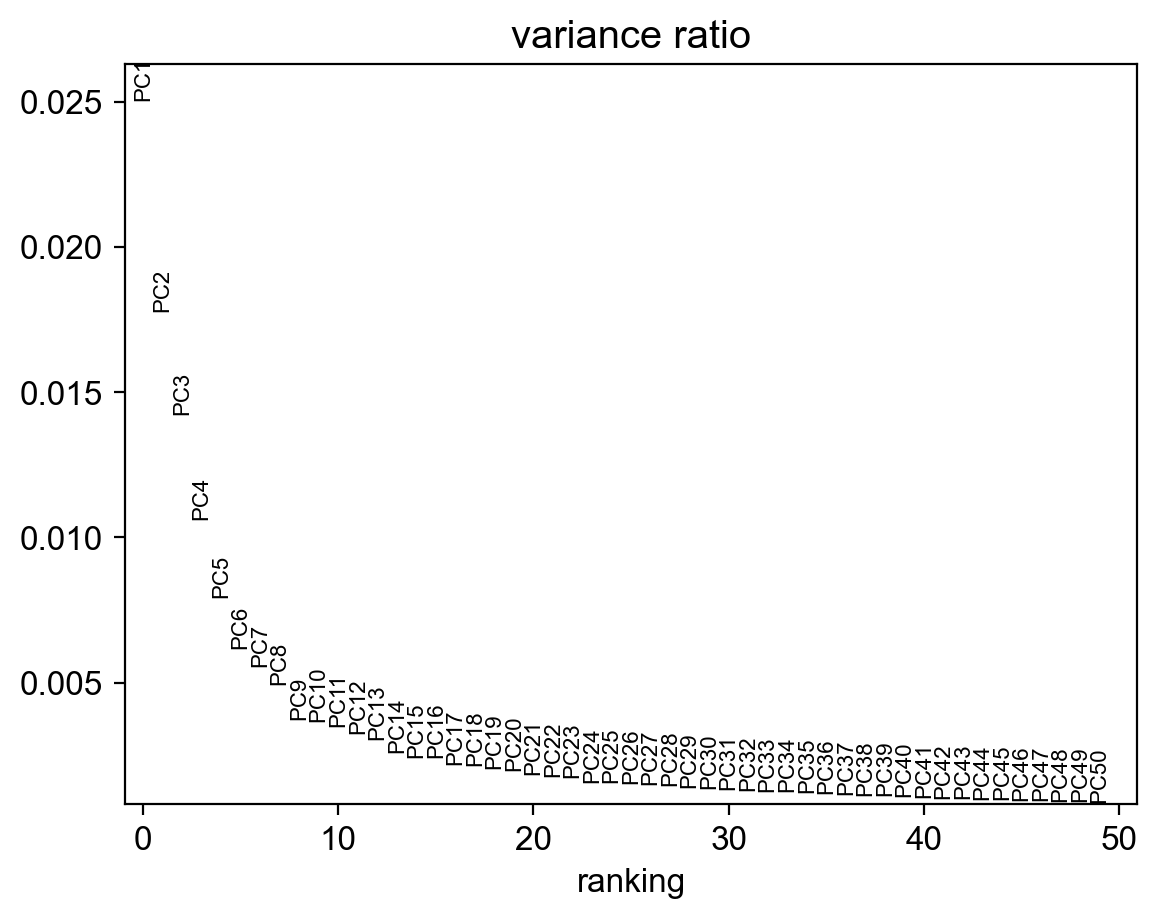

In [ ]:
sc.pl.pca_variance_ratio(ad_sct, 50)

In [ ]:
sc.pp.neighbors(ad_sct, n_pcs=30)

In [ ]:
sc.tl.umap(ad_sct, 0.3)

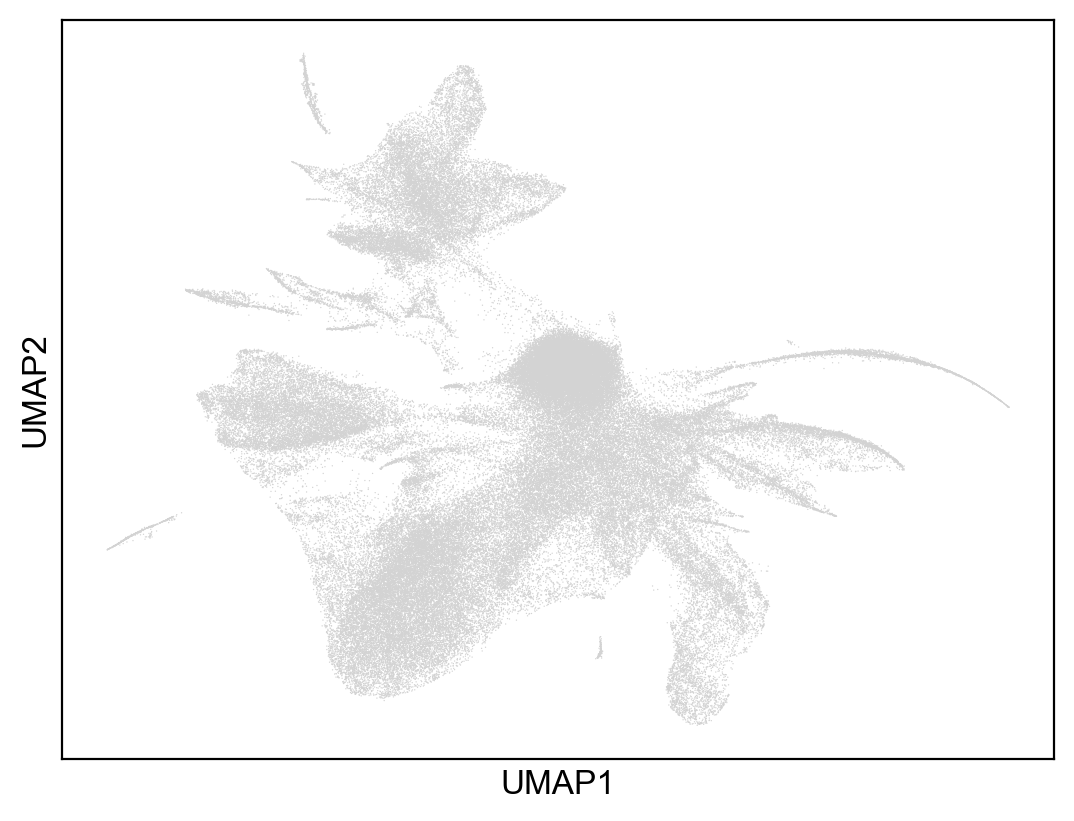

In [ ]:
sc.pl.umap(ad_sct)

In [ ]:
ad_sct.obs = ad.obs.copy()

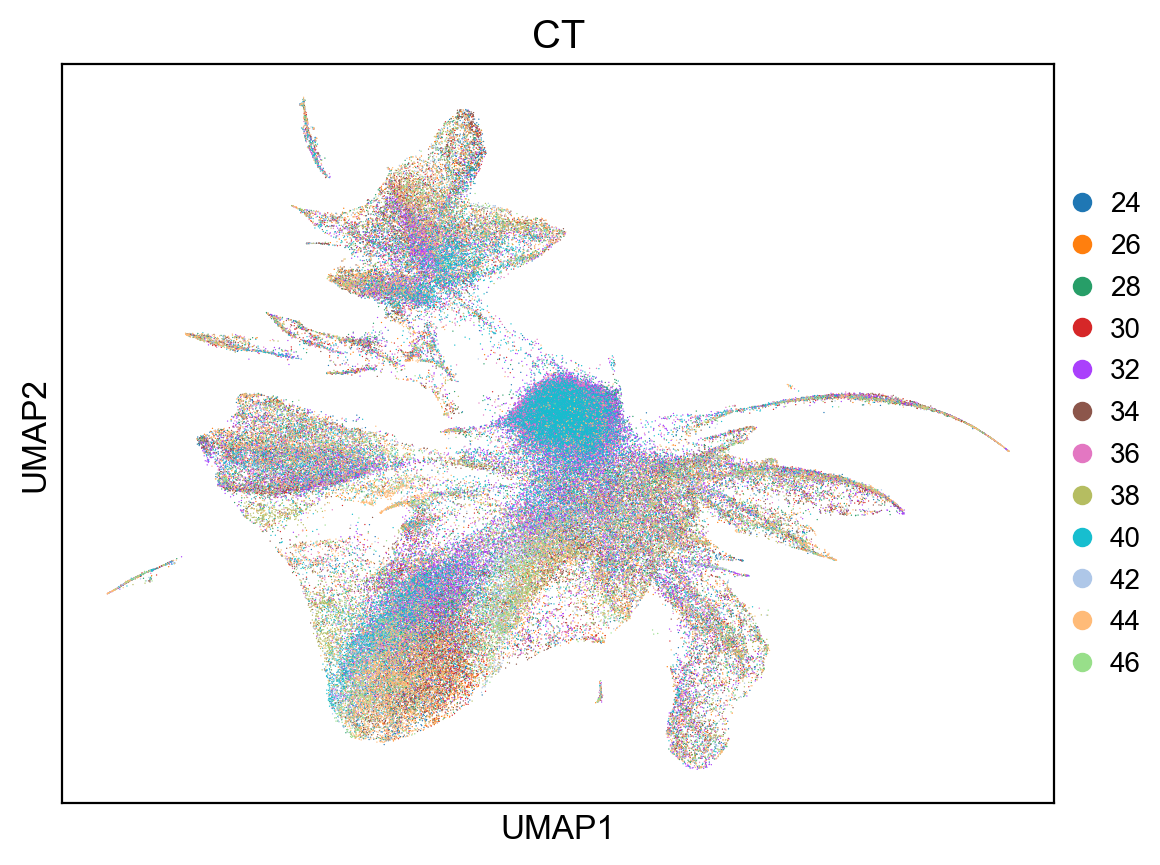

In [ ]:
sc.pl.umap(ad_sct, color="CT")

## harmony

In [ ]:
import scanpy.external as sce

In [ ]:
ad_sct.obsm["X_pca_30"] = ad_sct.obsm["X_pca"][:, :30]

In [ ]:
sce.pp.harmony_integrate(ad_sct, key="Batch", basis="X_pca_30")

2023-06-28 18:16:10,311 - harmonypy - INFO - Iteration 1 of 10
2023-06-28 18:16:10 - INFO - Iteration 1 of 10
2023-06-28 18:17:24,088 - harmonypy - INFO - Iteration 2 of 10
2023-06-28 18:17:24 - INFO - Iteration 2 of 10
2023-06-28 18:18:26,128 - harmonypy - INFO - Iteration 3 of 10
2023-06-28 18:18:26 - INFO - Iteration 3 of 10
2023-06-28 18:19:29,201 - harmonypy - INFO - Iteration 4 of 10
2023-06-28 18:19:29 - INFO - Iteration 4 of 10
2023-06-28 18:20:37,692 - harmonypy - INFO - Iteration 5 of 10
2023-06-28 18:20:37 - INFO - Iteration 5 of 10
2023-06-28 18:21:42,884 - harmonypy - INFO - Iteration 6 of 10
2023-06-28 18:21:42 - INFO - Iteration 6 of 10
2023-06-28 18:22:47,084 - harmonypy - INFO - Iteration 7 of 10
2023-06-28 18:22:47 - INFO - Iteration 7 of 10
2023-06-28 18:23:23,209 - harmonypy - INFO - Iteration 8 of 10
2023-06-28 18:23:23 - INFO - Iteration 8 of 10
2023-06-28 18:24:31,137 - harmonypy - INFO - Converged after 8 iterations
2023-06-28 18:24:31 - INFO - Converged after 8

In [ ]:
sc.pp.neighbors(ad_sct, use_rep="X_pca_harmony")

In [ ]:
sc.tl.umap(ad_sct, 0.3)

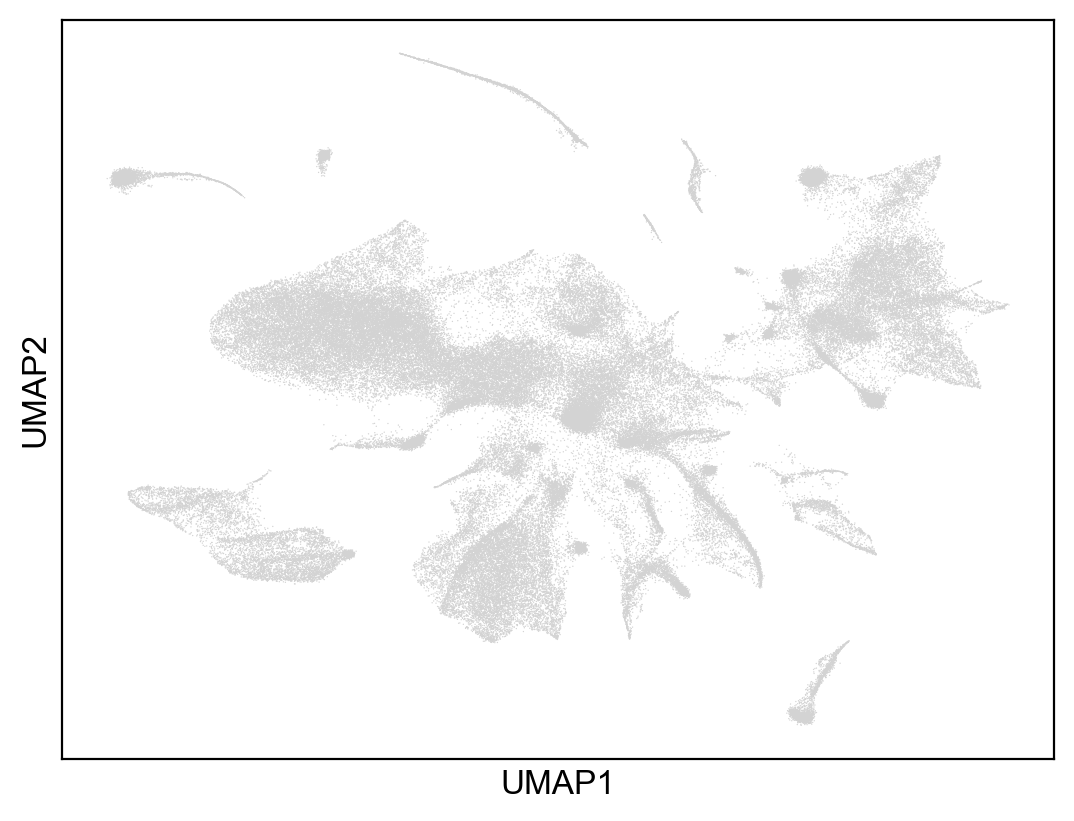

In [ ]:
sc.pl.umap(ad_sct)

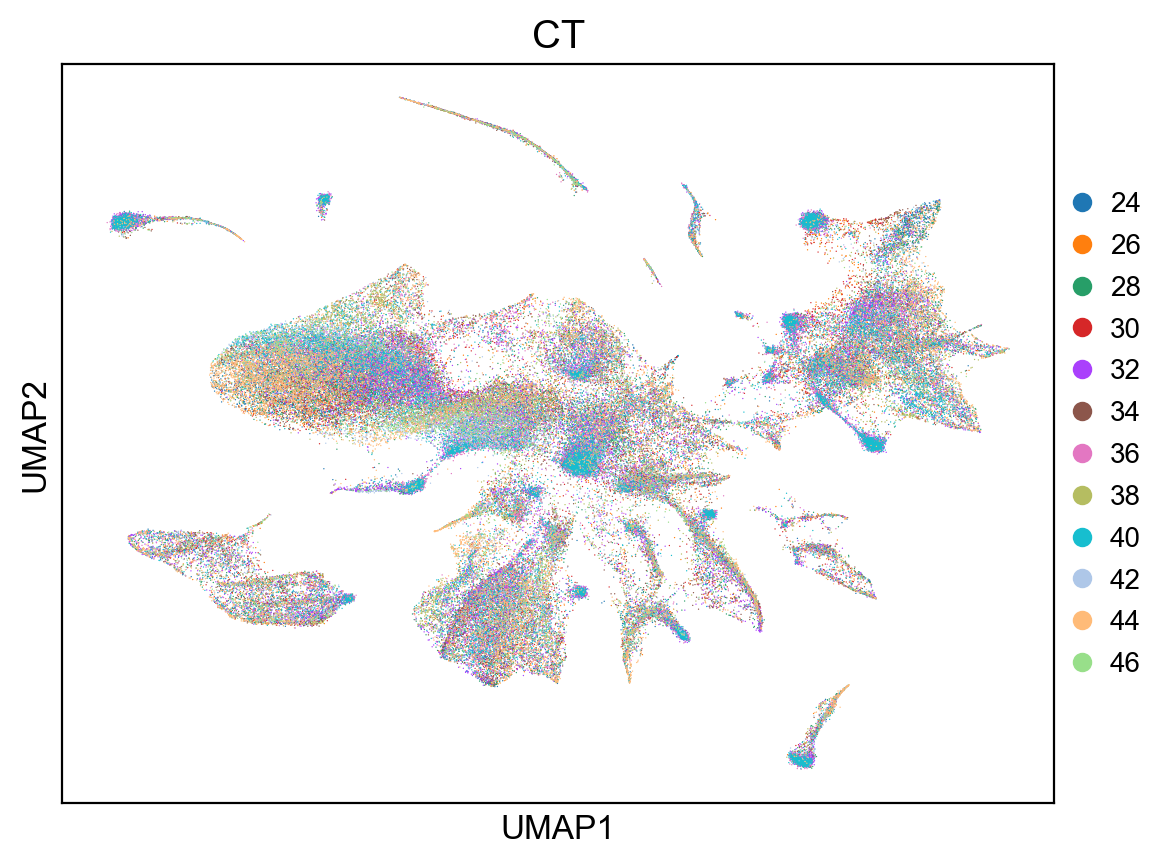

In [ ]:
sc.pl.umap(ad_sct, color="CT")

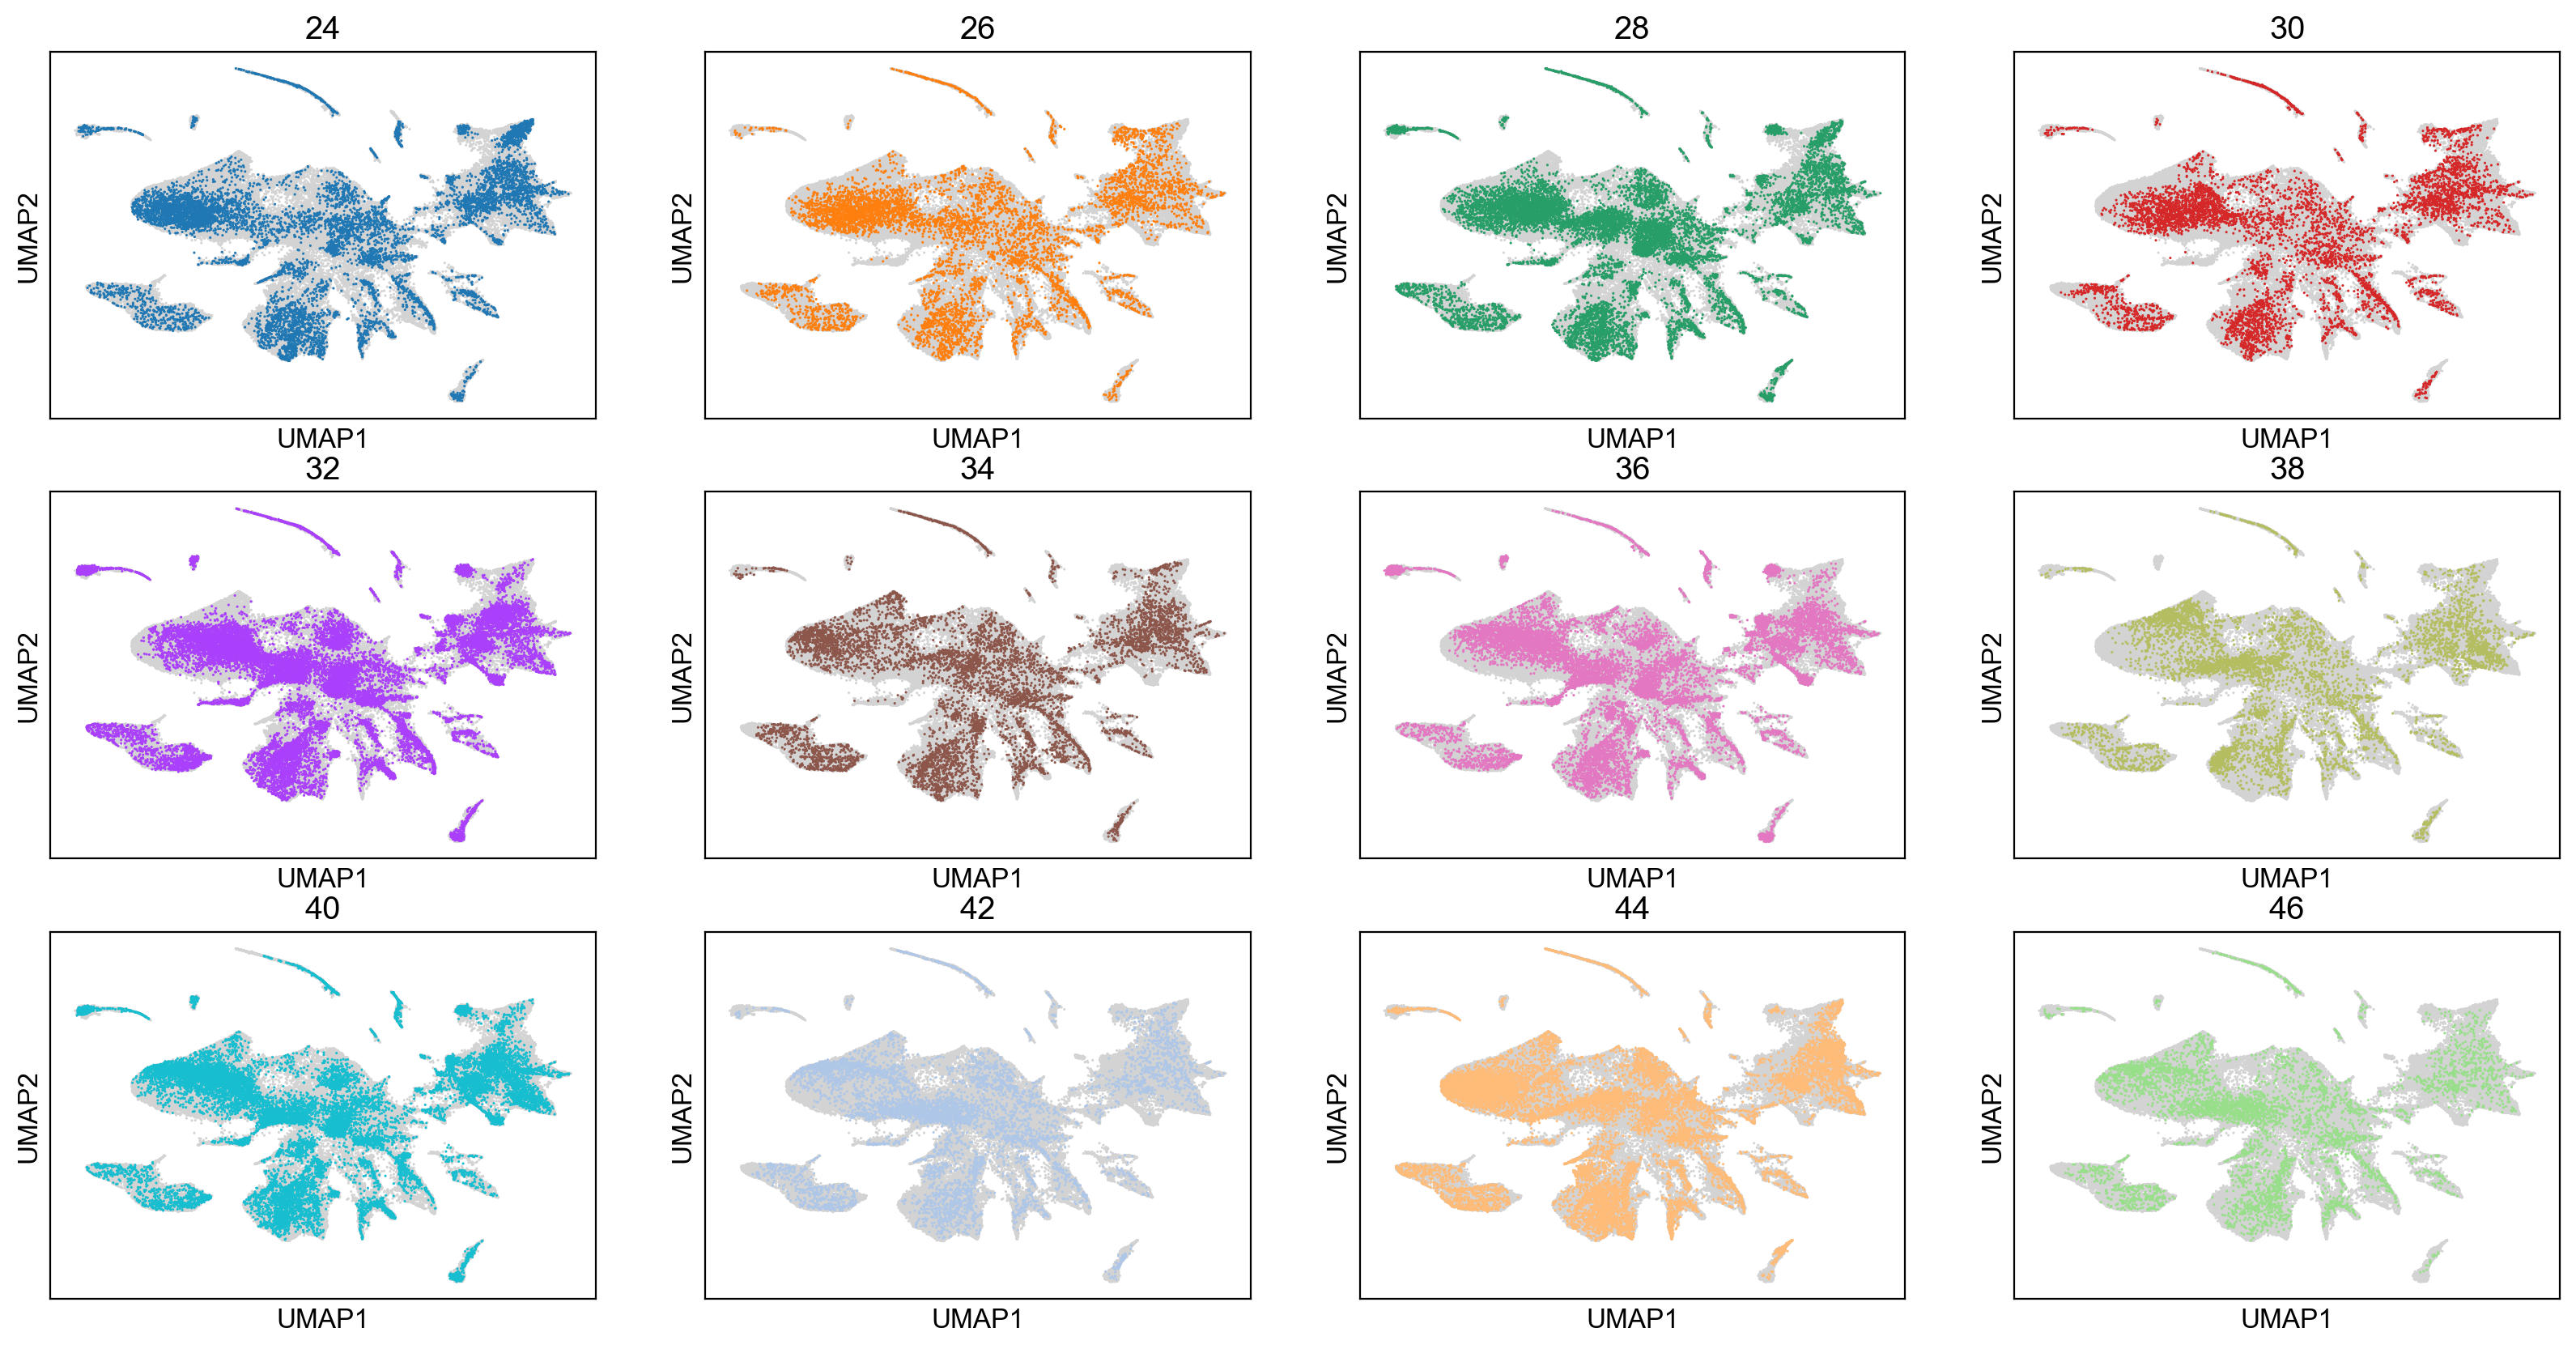

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(20, 10))
axs = axs.reshape(-1)
for sample, ax in zip(ad_sct.obs["CT"].cat.categories, axs):
    sc.pl.umap(
        ad_sct, color="CT", groups=[sample], ax=ax, show=False, legend_loc=None, size=5
    )
    ax.set_title(sample)
plt.show()

In [ ]:
toPkl(ad_sct, "ad_sct_20230628_after_sct", "ipf", dir_path=dir_temp)

2023-06-28 18:29:27.581 | INFO     | jpy_tools.otherTools:toPkl:476 - please run `loadPkl('ad_sct_20230628_after_sct', lambda **dt:sc.read_h5ad(**dt), arg_path='filename')` to get object


In [ ]:
ad.obsm["X_pca_30_sx"] = ad_sct.obsm["X_pca_30"].copy()
ad.obsm["X_pca_harmony_sx"] = ad_sct.obsm["X_pca_harmony"].copy()
ad.obsm["X_umap"] = ad_sct.obsm["X_umap"].copy()
ad.obsp["distances"] = ad_sct.obsp["distances"].copy()
ad.obsp["connectivities"] = ad_sct.obsp["connectivities"].copy()

In [ ]:
ad.obs['CT_batchOrder'] = ad.obs['CT'].cat.set_categories([*ad.obs['CT'].cat.categories[::2], *ad.obs['CT'].cat.categories[1::2]])

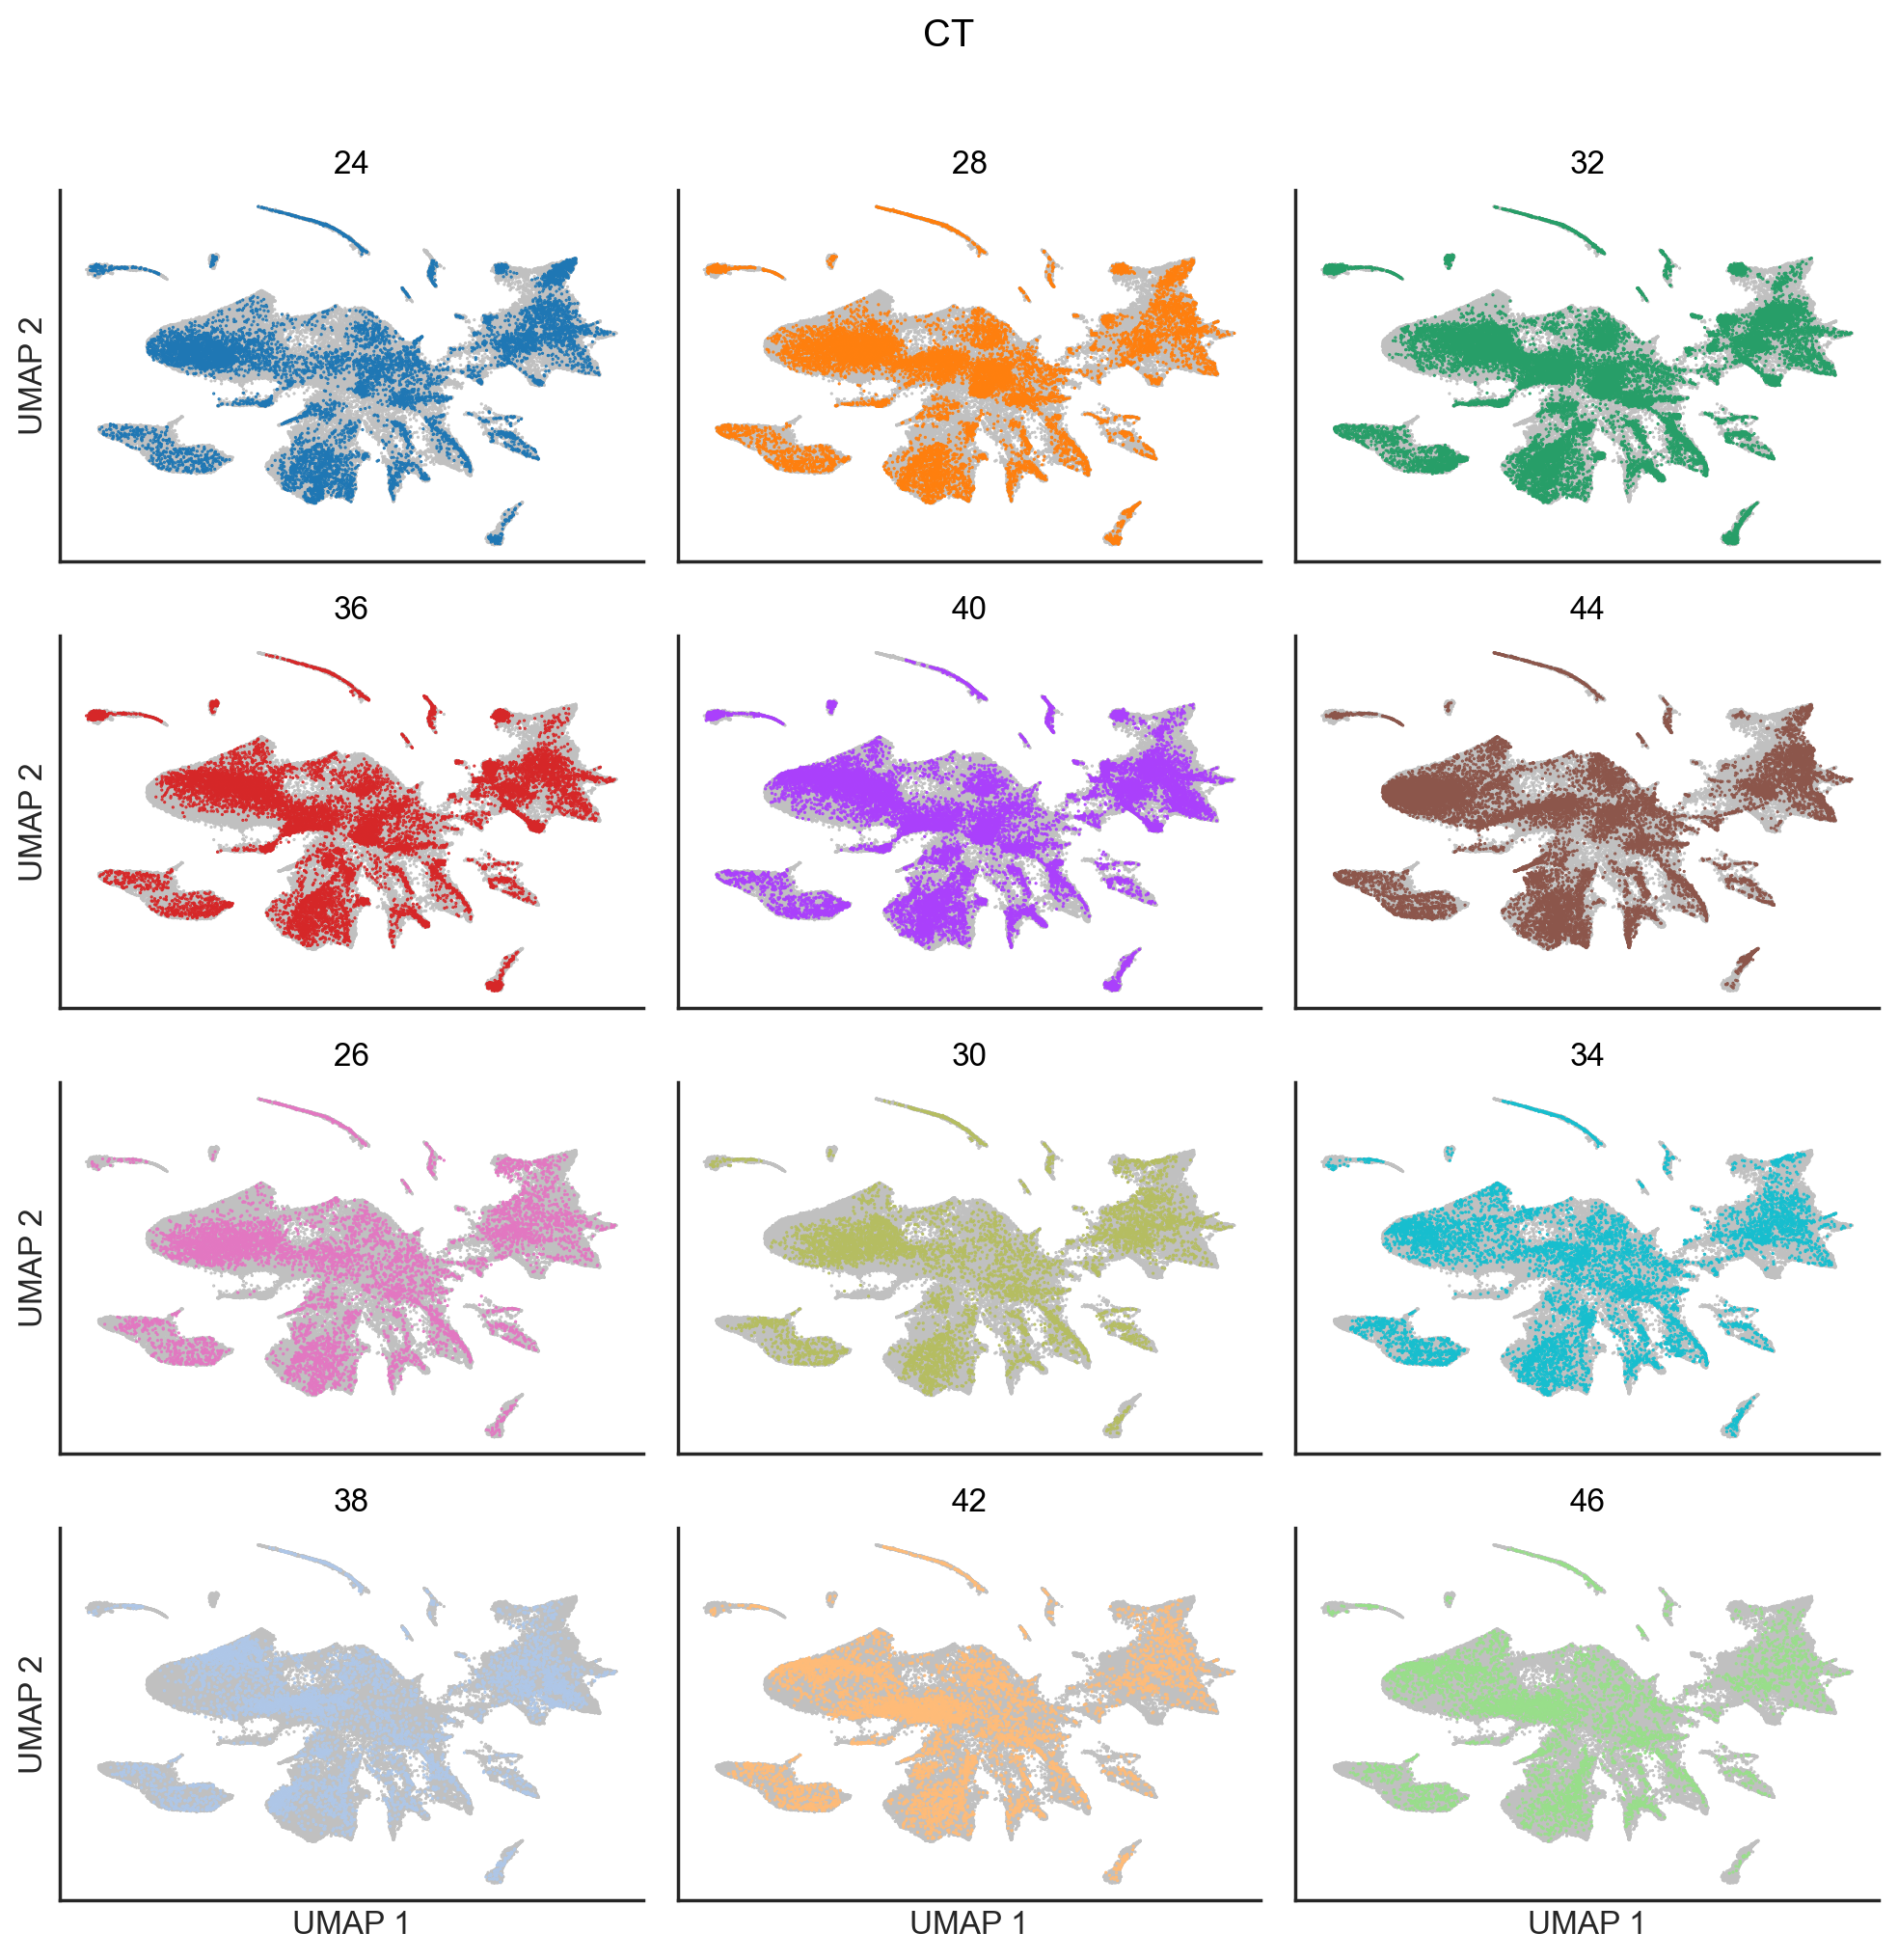

In [ ]:
singleCellTools.plotting.PlotAnndata(ad, 'sx').embedding('umap', color='CT_batchOrder', title='CT', wrap=3, figsize=(10,10), groupby='CT_batchOrder', addBackground=True, size=0.4, needLegend=False)[1]

In [ ]:
%store -r _df

In [ ]:
ad.obs["prev_celltype"] = _df["celltype"]

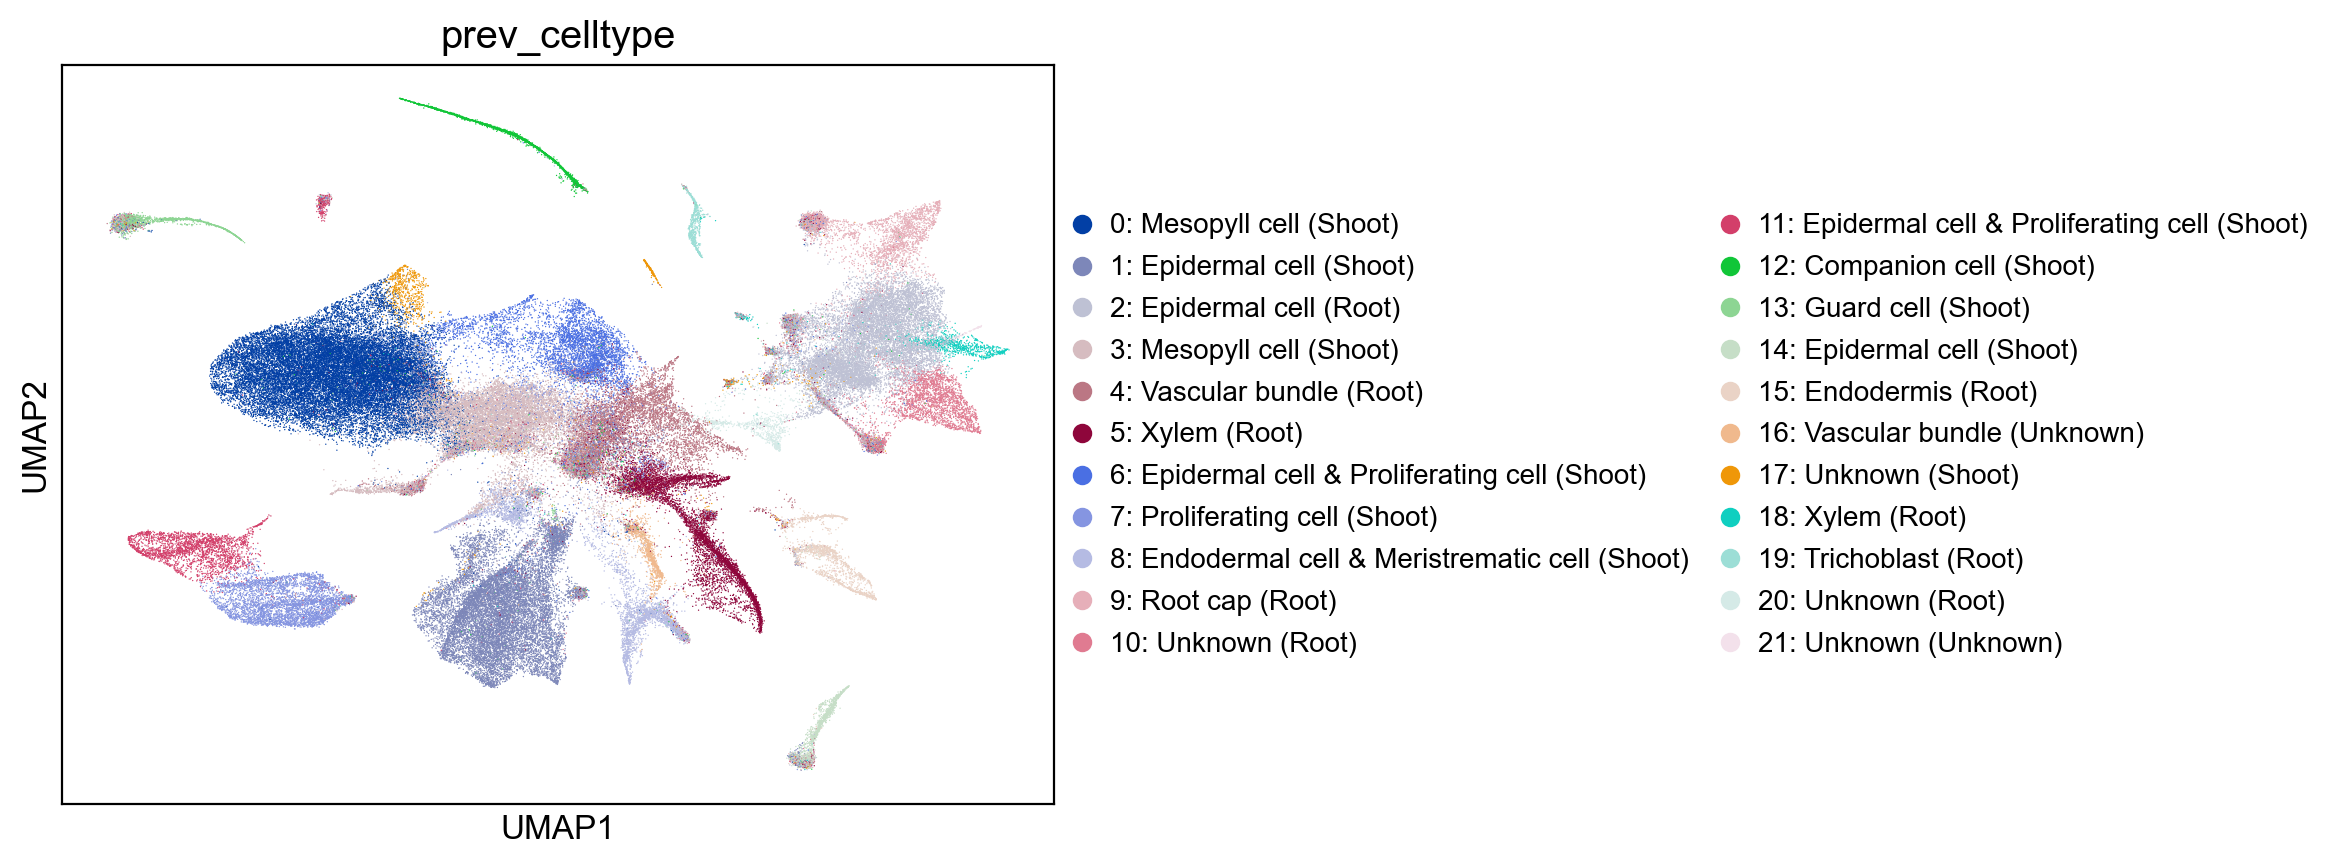

In [ ]:
sc.pl.umap(ad, color="prev_celltype")

([<matplotlib.collections.PathCollection at 0x2ade58d99250>,
 ['24', '26', '28', '30', '32', '34', '36', '38', '40', '42', '44', '46'])

In [ ]:
import legendkit

In [ ]:
plt.legend()

<ListLegend>

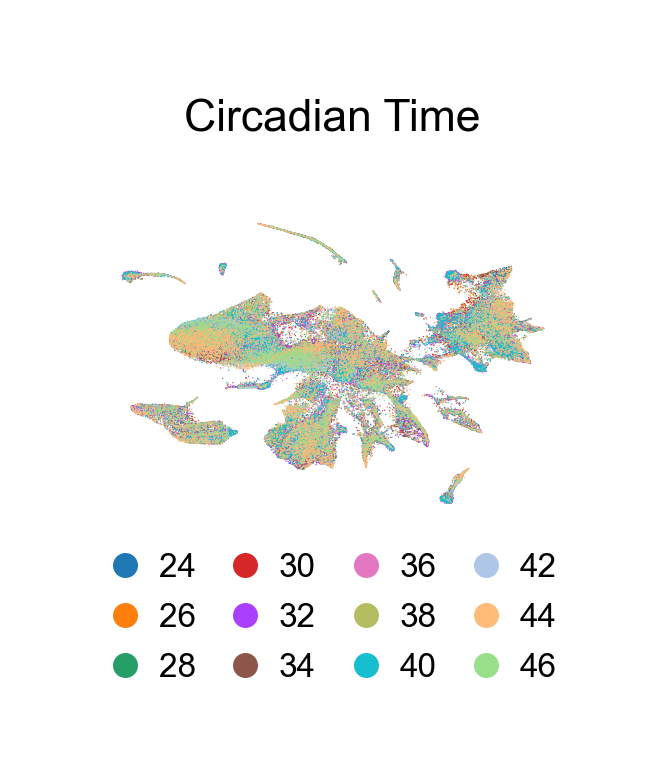

In [ ]:
fig, ax = plt.subplots(figsize=(3,2))
sc.pl.umap(ad, color="CT", show=False, ax=ax)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Circadian Time', y =1.2, fontsize=16)
h, l = ax.get_legend_handles_labels()
ax.get_legend().remove()
legendkit.legend(ax=ax, handles=h, labels=l, loc='out lower center', frameon=False, ncol=4, prop={'size': 12}, markerscale=3)


In [ ]:
# toPkl(ad, "ad_sct_sx_20230628", "ipf", dir_path=dir_temp)

2023-06-28 21:03:26.645 | INFO     | jpy_tools.otherTools:toPkl:476 - please run `loadPkl('ad_sct_sx_20230628', lambda **dt:sc.read_h5ad(**dt), arg_path='filename')` to get object


In [ ]:
ad = loadPkl(
    "ad_sct_sx_20230628",
    lambda **dt: sc.read_h5ad(**dt),
    arg_path="filename",
    dir_path=dir_temp,
)